In [ ]:
# !pip install pystan
# !pip install fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
dct = {}
dct['codigo'] = 'soja'

df = pd.read_pickle(f'../dados/cepea-{dct["codigo"]}.p')

In [ ]:
df = pd.read_pickle(f'/content/cepea-soja.p')
df.index = pd.to_datetime(df.index)
df_train = df['2007-01-01' : '2018-12-31']
df_test = df['2019-01-01' : '2020-12-31']

In [ ]:
dfp = df_train.drop(columns='preco_real', axis=1)
dfp = dfp.reset_index()
dfp.columns=['ds','y']

In [ ]:
def to_fb(df):
  df = df.drop(columns='preco_real', axis=1)
  df = df.reset_index()
  df.columns=['ds','y']
  return df

yreal = to_fb(df_test)
yfb = to_fb(df_train)

In [ ]:
m = Prophet()
m.fit(yfb)

future = m.make_future_dataframe(periods=734)
forecast = m.predict(future)
fore = forecast.loc[:,['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


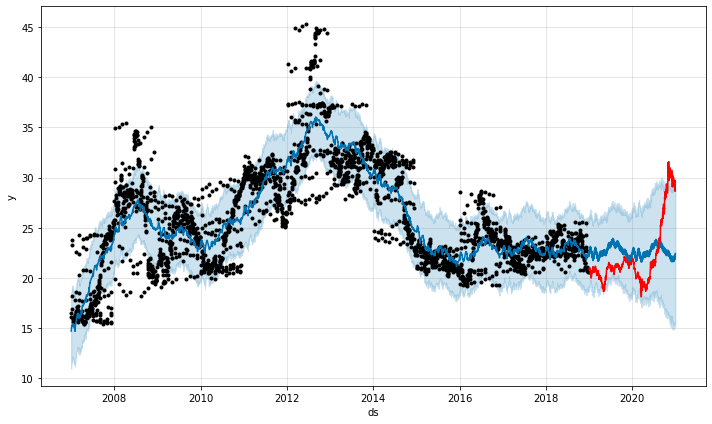

In [ ]:
m.plot(fore) # Azul: Previsto
plt.plot(yreal.ds.sort_values(), yreal.y, color='r') # Vermelho: Real

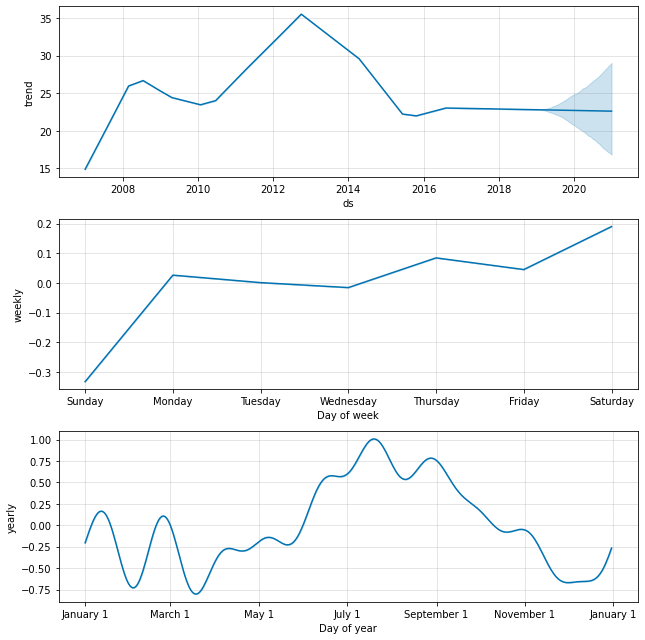

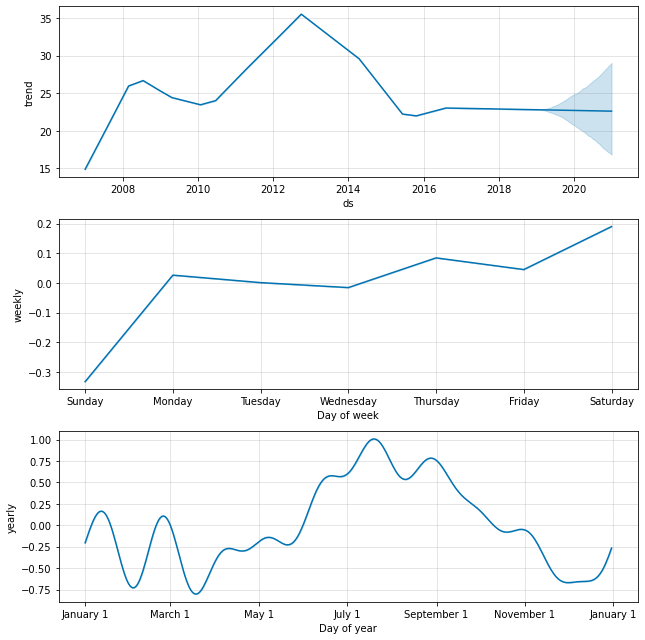

In [ ]:
m.plot_components(forecast)